## Libraries

In [453]:
import numpy as np
import pandas as pd
import pickle
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from fbprophet import Prophet
# from fbprophet.diagnostics import cross_validation
# from fbprophet.diagnostics import performance_metrics
# from fbprophet.plot import plot_cross_validation_metric

## Read Data

In [454]:
filename = "../data/data.csv"

In [455]:
df = pd.read_csv(filename)

In [456]:
df.count()

datetime       9047
consumption    9047
dtype: int64

In [457]:
df.head()

,datetime,consumption
0,"12/19/2018, 3:00:02 PM",249.0
1,"12/19/2018, 4:00:03 PM",294.0
2,"12/19/2018, 6:00:02 PM",287.0
3,"12/19/2018, 7:00:02 PM",285.0
4,"12/19/2018, 8:00:02 PM",228.0


### Convert index to datetime

In [458]:
df = pd.read_csv(filename,index_col = 'datetime',parse_dates=['datetime'])
df.head(5)

,consumption
datetime,
2018-12-19 15:00:02,249.0
2018-12-19 16:00:03,294.0
2018-12-19 18:00:02,287.0
2018-12-19 19:00:02,285.0
2018-12-19 20:00:02,228.0


### Verify that no value is null

In [459]:
df.isna().sum()

consumption    0
dtype: int64

In [460]:
df['consumption'] = df['consumption'] + 1

In [461]:
min(df.consumption)

1.0

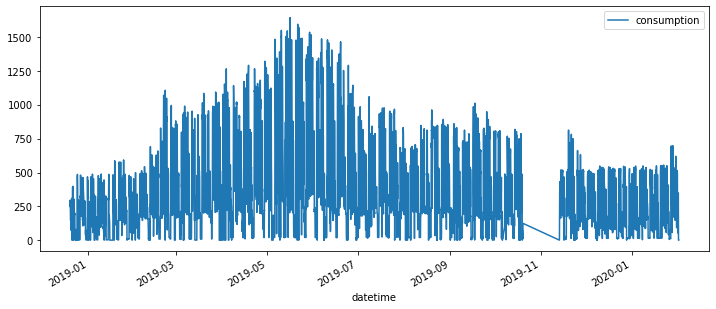

In [462]:
df.plot(figsize=(12,5),legend=True)
plt.show()

## Maximum Energy Consumption Values

In [463]:
df.nlargest(10,'consumption')

,consumption
datetime,
2019-05-16 12:00:02,1643.0
2019-05-16 11:00:01,1620.0
2019-05-21 15:00:02,1594.0
2019-05-21 16:00:02,1583.0
2019-05-22 14:00:02,1568.0
2019-05-22 15:00:02,1568.0
2019-05-22 12:00:01,1554.0
2019-05-22 13:00:02,1551.0
2019-05-10 15:00:02,1549.0


In [464]:
df = df.reset_index()

In [465]:
df.count()

datetime       9047
consumption    9047
dtype: int64

## Changing dataframe format specific to Prophet Model

In [466]:
df = df.rename(columns={'datetime':'ds','consumption':'y'})

In [467]:
df.count()

ds    9047
y     9047
dtype: int64

In [468]:
df.nlargest(10,'y')

,ds,y
3502,2019-05-16 12:00:02,1643.0
3501,2019-05-16 11:00:01,1620.0
3625,2019-05-21 15:00:02,1594.0
3626,2019-05-21 16:00:02,1583.0
3648,2019-05-22 14:00:02,1568.0
3649,2019-05-22 15:00:02,1568.0
3646,2019-05-22 12:00:01,1554.0
3647,2019-05-22 13:00:02,1551.0
3361,2019-05-10 15:00:02,1549.0
3650,2019-05-22 16:00:01,1548.0


In [469]:
df.y = np.log(df.y)

## Model Fitting

In [470]:
model = Prophet()

In [471]:
model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


## Predictions

In [472]:
# future = model.make_future_dataframe(periods=365)

In [473]:
# future.head()

In [474]:
prediction=model.predict(df)

In [475]:
prediction.count()

ds                            9047
trend                         9047
yhat_lower                    9047
yhat_upper                    9047
trend_lower                   9047
trend_upper                   9047
additive_terms                9047
additive_terms_lower          9047
additive_terms_upper          9047
daily                         9047
daily_lower                   9047
daily_upper                   9047
weekly                        9047
weekly_lower                  9047
weekly_upper                  9047
multiplicative_terms          9047
multiplicative_terms_lower    9047
multiplicative_terms_upper    9047
yhat                          9047
dtype: int64

In [476]:
# df.y = np.exp(df.y)

In [477]:
# prediction[prediction.columns[1:]] = np.exp(prediction[prediction.columns[1:]])

In [478]:
prediction.nlargest(10,'yhat')

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3788,2019-05-28 10:00:02,5.814487,5.717063,8.880008,5.814487,5.814487,1.481545,1.481545,1.481545,0.667667,0.667667,0.667667,0.813878,0.813878,0.813878,0.0,0.0,0.0,7.296032
3620,2019-05-21 10:00:02,5.808079,5.742194,8.856326,5.808079,5.808079,1.481545,1.481545,1.481545,0.667667,0.667667,0.667667,0.813878,0.813878,0.813878,0.0,0.0,0.0,7.289624
3789,2019-05-28 11:00:01,5.814269,5.762910,8.887496,5.814269,5.814269,1.474239,1.474239,1.474239,0.690523,0.690523,0.690523,0.783716,0.783716,0.783716,0.0,0.0,0.0,7.288508
3621,2019-05-21 11:00:02,5.808162,5.633066,8.924301,5.808162,5.808162,1.474212,1.474212,1.474212,0.690505,0.690505,0.690505,0.783707,0.783707,0.783707,0.0,0.0,0.0,7.282375
3452,2019-05-14 10:00:02,5.790316,5.781109,8.889706,5.790316,5.790316,1.481545,1.481545,1.481545,0.667667,0.667667,0.667667,0.813878,0.813878,0.813878,0.0,0.0,0.0,7.271861
3453,2019-05-14 11:00:02,5.790581,5.737622,8.882503,5.790581,5.790581,1.474212,1.474212,1.474212,0.690505,0.690505,0.690505,0.783707,0.783707,0.783707,0.0,0.0,0.0,7.264794
3956,2019-06-04 10:00:02,5.777868,5.788664,8.825308,5.777868,5.777868,1.481545,1.481545,1.481545,0.667667,0.667667,0.667667,0.813878,0.813878,0.813878,0.0,0.0,0.0,7.259413
3957,2019-06-04 11:00:03,5.777650,5.646700,8.893150,5.777650,5.777650,1.474185,1.474185,1.474185,0.690487,0.690487,0.690487,0.783698,0.783698,0.783698,0.0,0.0,0.0,7.251835
3292,2019-05-07 10:00:02,5.745713,5.504456,8.776400,5.745713,5.745713,1.481545,1.481545,1.481545,0.667667,0.667667,0.667667,0.813878,0.813878,0.813878,0.0,0.0,0.0,7.227259
4122,2019-06-11 10:00:02,5.741249,5.548434,8.719880,5.741249,5.741249,1.481545,1.481545,1.481545,0.667667,0.667667,0.667667,0.813878,0.813878,0.813878,0.0,0.0,0.0,7.222795


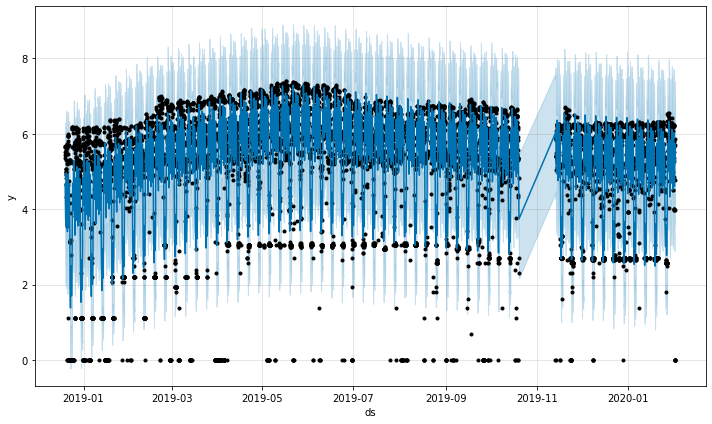

In [479]:
fig = model.plot(prediction)

## Monthly, Daywise and Timewise distribution

In [480]:
prediction[prediction.columns[1:]] = np.exp(prediction[prediction.columns[1:]])

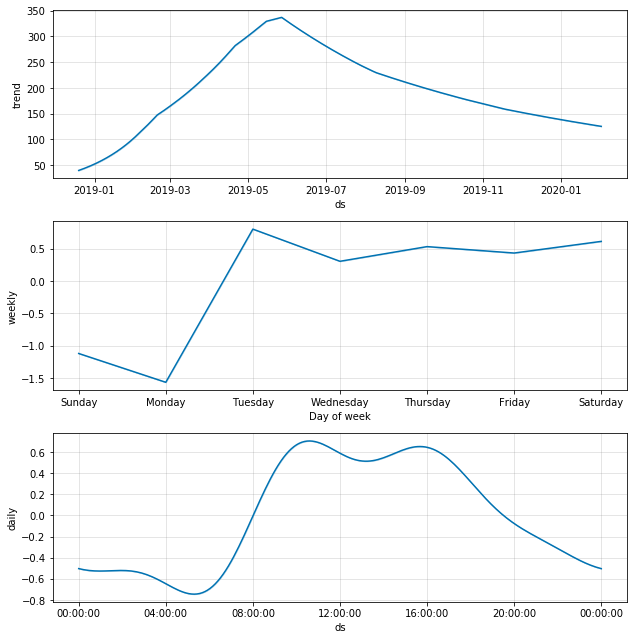

In [481]:
fig = model.plot_components(prediction)

In [482]:
df.head()

,ds,y
0,2018-12-19 15:00:02,5.521461
1,2018-12-19 16:00:03,5.686975
2,2018-12-19 18:00:02,5.662960
3,2018-12-19 19:00:02,5.655992
4,2018-12-19 20:00:02,5.433722


In [483]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-12-19 15:00:02,39.725516,21.214082,543.418836,39.725516,39.725516,2.586285,2.586285,2.586285,1.871735,1.871735,1.871735,1.381758,1.381758,1.381758,1.0,1.0,1.0,102.741524
1,2018-12-19 16:00:03,39.761870,20.654349,544.717593,39.761870,39.761870,2.694575,2.694575,2.694575,1.905287,1.905287,1.905287,1.414262,1.414262,1.414262,1.0,1.0,1.0,107.141350
2,2018-12-19 18:00:02,39.834648,16.964307,441.735349,39.834648,39.834648,2.040649,2.040649,2.040649,1.374294,1.374294,1.374294,1.484871,1.484871,1.484871,1.0,1.0,1.0,81.288535
3,2018-12-19 19:00:02,39.871092,12.425979,349.027433,39.871092,39.871092,1.672953,1.672953,1.672953,1.099217,1.099217,1.099217,1.521950,1.521950,1.521950,1.0,1.0,1.0,66.702446
4,2018-12-19 20:00:02,39.907569,13.560258,314.872952,39.907569,39.907569,1.444034,1.444034,1.444034,0.925994,0.925994,0.925994,1.559441,1.559441,1.559441,1.0,1.0,1.0,57.627872


## Errors

In [484]:
mean_squared_error(y_true=df['y'],y_pred=prediction['yhat'])

142807.7938269033

In [485]:
mean_absolute_error(y_true=df['y'],y_pred=prediction['yhat'])

284.69123078204848

In [486]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_true=df['y'],y_pred=prediction['yhat'])

/home/kanish/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning:

divide by zero encountered in true_divide



inf

In [487]:
# df_cv = cross_validation(model, initial='300 days', period='35 days', horizon='70 days')
# df_cv.head()

In [488]:
# performance_metrics_results = performance_metrics(df_cv)
# print(performance_metrics_results)

In [489]:
# plot_cross_validation_metric(df_cv, metric='mape')

## Prediction

In [490]:
data = ['2019-05-28 10:00:02']
test = pd.DataFrame(data, columns = ['ds']) 

In [491]:
test.ds

0    2019-05-28 10:00:02
Name: ds, dtype: object

In [492]:
val = model.predict(test)

In [493]:
val[val.columns[1:]] = np.exp(val[val.columns[1:]])

In [494]:
val

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-05-28 10:00:02,335.11937,287.317406,7460.919585,335.11937,335.11937,4.399739,4.399739,4.399739,1.949684,1.949684,1.949684,2.256642,2.256642,2.256642,1.0,1.0,1.0,1474.437718


In [452]:
val['yhat']

0    1474.437718
Name: yhat, dtype: float64

## Saving Model

In [38]:
type(model)

fbprophet.forecaster.Prophet

In [39]:
pkl_path = "model.pkl"

In [40]:
model = Prophet()

In [41]:
df.head()

,ds,y
0,2018-12-19 15:00:02,250.0
1,2018-12-19 16:00:03,295.0
2,2018-12-19 18:00:02,288.0
3,2018-12-19 19:00:02,286.0
4,2018-12-19 20:00:02,229.0


In [42]:
model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [43]:
with open('forecast_model.pkl', 'wb') as fout:
    pickle.dump(model, fout)

TypeError: can't pickle _thread.RLock objects

In [ ]:
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)